# **Ebay Perfume Analysis**

Dataset: https://www.kaggle.com/datasets/kanchana1990/perfume-e-commerce-dataset-2024

# <u>**Introduction</u>**

In data science consultancy role, as a data scientist Ebay hired me to do perfume sales analysis. They need different sales analysis of perfume like availability, different perfume models,sold,price.Here 2 CSV files of men's & women's perfume data. The company asks to do with men's perfume analysis. Then we create EDA (Exploratory Data Analysis) pipeline. My job to create EDA to present to find the easily understand adopt different strategies.




## **<u>Busniess Context</u>**

The Company need perfume analysis which offer best perfume to the different regions, sold,availablity,price. In this area we just take 1001 data of mens perfume from ebay website. This file provide 2 csv file so we just take mens perfume data. In this file 1001 data for exploration.

Brand: Name of the perfume

Title: Specific model

Type: Which category belongs to

Price: Exact price

Price with currency: Different region with different currency used

Avaiable: Model available

Available Text: Number of perfumes till available

Sold: perfume sold

Last updated: Perfume data updating

Item location: Perfume loactions


**Import data for data processing**

In [ ]:
import pandas as pd
df = pd.read_csv('ebay_mens_perfume.csv')
print(df.columns)
df.head(10)


Index(['brand', 'title', 'type', 'price', 'priceWithCurrency', 'available',
       'availableText', 'sold', 'lastUpdated', 'itemLocation'],
      dtype='object')


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"
5,Multiple Brands,Men's Perfume Sampler 10pcs Sample Vials Desig...,Perfume,14.99,US $14.99,10.0,More than 10 available / 79 sold,79.0,"May 23, 2024 06:57:41 PDT","Houston, Texas, United States"
6,Maison Alhambra,Glacier Bold by Maison Alhambra 3.4oz EDP for ...,Eau de Parfum,30.99,US $30.99/ea,9.0,9 available / 39 sold,39.0,"May 16, 2024 13:42:49 PDT","Englewood Cliffs, New Jersey, United States"
7,Lattafa,Parfums De-Marly-Haltane Eau de Parfum spray 4...,Eau de Parfum,85.00,US $85.00,NaN,Last One / 6 sold,6.0,"May 24, 2024 00:10:39 PDT","Ithaca, New York, United States"
8,Lattafa,Hawas for him Eau De Parfum By Rasasi 100ml 3....,/,15.89,US $15.89,10.0,10 available / 17 sold,17.0,"May 24, 2024 09:08:14 PDT","shanghai, China"
9,Gucci,Gucci Guilty for Him - Classic 3oz Eau de Toil...,Eau de Parfum,49.99,US $49.99/ea,8.0,8 available / 68 sold,68.0,"May 23, 2024 07:21:23 PDT","Dearborn Heights, Michigan, United States"


In [ ]:
df.describe()


,price,available,sold
count,1000.000000,889.000000,994.000000
mean,46.481200,20.046119,766.266600
std,35.527862,61.547985,3200.971733
min,3.000000,2.000000,1.000000
25%,22.990000,5.000000,14.000000
50%,35.710000,10.000000,49.500000
75%,59.000000,10.000000,320.500000
max,259.090000,842.000000,54052.000000


**Find the missing values in the dataset**

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

brand                  1
title                  0
type                   3
price                  0
priceWithCurrency      0
available            111
availableText          3
sold                   6
lastUpdated           53
itemLocation           0
dtype: int64


**Clear all the missing value from the dataset**

In [ ]:
df['type'].fillna(df['type'].mode()[0], inplace=True)

In [ ]:
df['available'].fillna(0, inplace=True)

In [ ]:
df['availableText'].fillna('Not Specified', inplace=True)

In [ ]:
df['sold'].fillna(0, inplace=True)

In [ ]:
df['lastUpdated'].fillna('Unknown', inplace=True)

In [ ]:
df['brand'].fillna('Unknown', inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

brand                0
title                0
type                 0
price                0
priceWithCurrency    0
available            0
availableText        0
sold                 0
lastUpdated          0
itemLocation         0
dtype: int64


**Remove unwanted /ea from the dataset(price column) not needed**

In [ ]:
df = df[~df['priceWithCurrency'].str.contains('/ea', case=False, na=False)] #Removing /ea (unwanted item)
df.head(10)

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,0.0,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"
5,Multiple Brands,Men's Perfume Sampler 10pcs Sample Vials Desig...,Perfume,14.99,US $14.99,10.0,More than 10 available / 79 sold,79.0,"May 23, 2024 06:57:41 PDT","Houston, Texas, United States"
7,Lattafa,Parfums De-Marly-Haltane Eau de Parfum spray 4...,Eau de Parfum,85.00,US $85.00,0.0,Last One / 6 sold,6.0,"May 24, 2024 00:10:39 PDT","Ithaca, New York, United States"
8,Lattafa,Hawas for him Eau De Parfum By Rasasi 100ml 3....,/,15.89,US $15.89,10.0,10 available / 17 sold,17.0,"May 24, 2024 09:08:14 PDT","shanghai, China"
12,SECERTMU,New 2024 Sexy Cologne Cupid Hypnosis Long Last...,Perfume,15.99,US $15.99,10.0,More than 10 available / 889 sold,889.0,"May 21, 2024 19:20:12 PDT","San Francisco, California, United States"
16,Grandeur,Tribal Intense by Grandeur - Eau de Parfum for...,Eau de Parfum,37.99,US $37.99,10.0,More than 10 available / 44 sold,44.0,"May 24, 2024 08:14:43 PDT","Miami, Florida, United States"
19,Dior,Dior Sauvage Eau de Toilette 3.4 Oz 100ml Bran...,Eau de Toilette,83.95,US $83.95,4.0,4 available / 22 sold,22.0,"May 22, 2024 14:31:55 PDT","Elmhurst, New York, United States"
22,Dumont,Dumont Men's Nitro Red EDP Spray 3.4 oz Fragra...,Fragrances,49.99,US $49.99,3.0,3 available / 187 sold,187.0,"May 24, 2024 09:02:39 PDT","Brooklyn, New York, United States"


Business Question <br>
1.  What is the stock & availability of perfume with low price?


In [ ]:
low_price_threshold = df['price'].quantile(0.25)
low_price_perfumes = df[df['price'] <= low_price_threshold]
low_price_perfumes[['title', 'brand', 'price', 'available', 'sold']].sort_values(by='price', ascending=True)



,title,brand,price,available,sold
778,Alexandria fragrances: BLACK PANTHER INSPIRED ...,Alexandria Fragrances,3.00,39.0,4.0
61,6 For $19.95 MEN(M) WOMEN(W) & UNISEX(U) Body ...,2nd To None,6.65,9.0,18882.0
688,New 2024 Sexy Cologne Cupid Hypnosis Long Last...,SECERTMU,6.96,10.0,102.0
136,New 2024 Sexy Cologne Cupid Hypnosis Long Last...,SECERTMU,6.97,10.0,803.0
904,Cologne Fragrance Aluminum Car Air Freshener f...,Unbranded,7.19,10.0,131.0
...,...,...,...,...,...
232,Maison Alhambra Men's Salvo Intense EDP 3.4 oz...,Maison Alhambra,19.73,3.0,18.0
220,Hermes Men's Terre d'Hermes EDT Spray 0.42 oz ...,Hermes,19.73,3.0,20.0
439,Afnan Men's Penthouse Ginza EDP Spray 3.4 oz F...,Afnan,19.73,3.0,5.0
694,Versace Men's L'Homme EDT Spray 3.4 oz (Tester...,Versace,19.73,3.0,7.0


Conclusion: It seems that are is no regular pattern for availability or Stock of perfume with low price. From the above table it is clear that the perfume with the lowest price is Alexandria Fragrances. However, only 4 of them has been sold so far leaving 39 of them in stock.

On the other hand, the second lowest perfume with price 6.65 dollars have sold 18882 pieces, leaving only 9 in stock. This clearly states that this is one of the most prefered perfumes.

Business Question <br>
2. what are the perfume that are out of stock or perfume with high demand?

In [ ]:
import pandas as pd
df = pd.read_csv('/content/ebay_mens_perfume.csv')
high_demand_threshold = df['sold'].quantile(0.75)
low_stock_high_demand = df[(df['available'] <= 3) & (df['sold'] >= high_demand_threshold)]
low_stock_high_demand[['title', 'brand', 'price', 'available', 'sold', 'itemLocation']].sort_values(by='sold', ascending=True)

,title,brand,price,available,sold,itemLocation
100,Nautica Voyage Men's EDT 3.4 oz Cologne Spray ...,Nautica,17.99,3.0,324.0,"Detroit, Michigan, United States"
854,Eau D'Orange Verte by Hermes Cologne for Men 3...,HERMÈS,62.62,3.0,335.0,"Hackensack, New Jersey, United States"
936,Diesel Only The Brave by Diesel EDT Cologne fo...,Diesel,56.00,3.0,677.0,"Hackensack, New Jersey, United States"
777,Lacoste Eau De Lacoste Blanc L.12.12 Cologne f...,Lacoste,54.50,2.0,1995.0,"Hackensack, New Jersey, United States"


Conclusion: Lacoste Eau De is the high demand perfume with lesser number of availability than compared to other brands

 Business Question <br>
3. What is the Average Price & sales of Tommy Hilfiger and Ralph lauren?


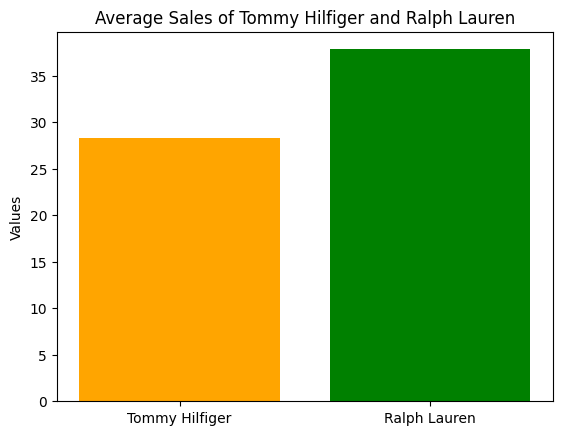

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/ebay_mens_perfume.csv')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['sold'] = pd.to_numeric(df['sold'], errors='coerce')

tommy_df = df[df['brand'] == 'Tommy Hilfiger']
ralph_df = df[df['brand'] == 'Ralph Lauren']

#Take average price
average_price_tommy = tommy_df['price'].mean()
average_price_ralph = ralph_df['price'].mean()

#Plot the result
fig, bx = plt.subplots()
bx.bar(['Tommy Hilfiger', 'Ralph Lauren'], [average_price_tommy, average_price_ralph], color=['orange', 'green'])
bx.set_ylabel('Values')
bx.set_title('Average Sales of Tommy Hilfiger and Ralph Lauren')
plt.show()

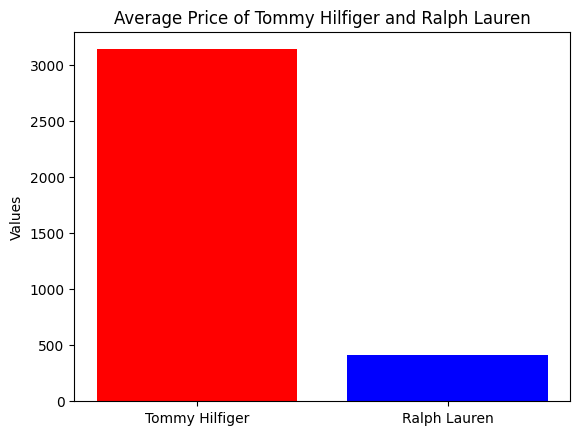

In [ ]:
#Take average sales
average_sales_tommy = tommy_df['sold'].mean()
average_sales_ralph = ralph_df['sold'].mean()

#Plot the result
fig, bx = plt.subplots()
bx.bar(['Tommy Hilfiger', 'Ralph Lauren'], [average_sales_tommy, average_sales_ralph], color=['red', 'blue'])
bx.set_ylabel('Values')
bx.set_title('Average Price of Tommy Hilfiger and Ralph Lauren')
plt.show()

In [ ]:
print(f'Average Price of Tommy Hilfiger: {average_price_tommy}')
print(f'Average Price of Ralph Lauren: {average_price_ralph}')
print()
print(f'Average Sales of Tommy Hilfiger: {average_sales_tommy}')
print(f'Average Sales of Ralph Lauren: {average_sales_ralph}')

Average Price of Tommy Hilfiger: 28.25
Average Price of Ralph Lauren: 37.82487804878049

Average Sales of Tommy Hilfiger: 3142.0
Average Sales of Ralph Lauren: 408.7073170731707


Conclusion: its is clear that average price of Ralph Lauren is higher than Tommy Hilfiger. However, average sales of Tommy Hilfiger is more than average sales of Ralph Lauren. So we can conclude that customer gives more priority to the product price over the product brand

Business Question <br>
4. Correlation b/w number of units sold & price in mens perfume?



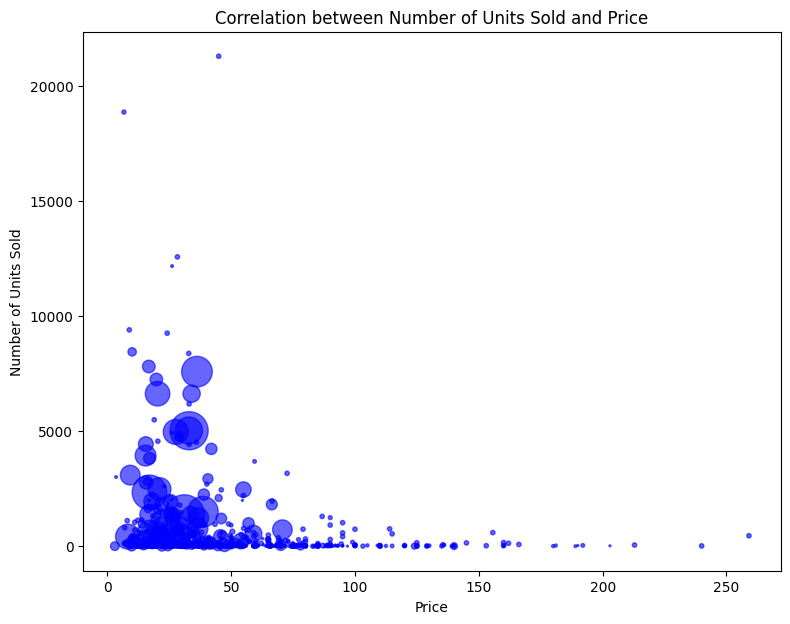

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/ebay_mens_perfume.csv'
data = pd.read_csv(file_path)
plt.figure(figsize=(9, 7))

#Use scatterplot method to visualize
plt.scatter(data['price'], data['sold'], data['available'],alpha=0.6, color='blue')
plt.xlabel('Price')
plt.ylabel('Number of Units Sold')
plt.title('Correlation between Number of Units Sold and Price')
plt.show()



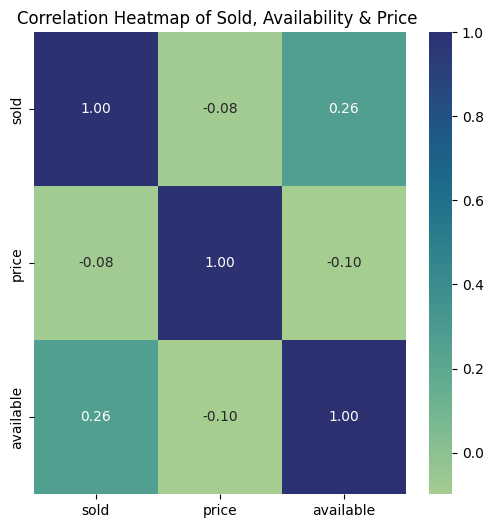

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['sold'] = pd.to_numeric(df['sold'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['available'] = pd.to_numeric(df['available'], errors='coerce')

df_features = df[['sold', 'price', 'available']]

# Correlation matrix
correlation = df_features.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(correlation, annot=True, cmap='crest', fmt='.2f')

#Correlation representation title
plt.title('Correlation Heatmap of Sold, Availability & Price ')
plt.show()

Conclusion: Using scatter plot & heatmap for better analysis for find the sold,price,availability in the perfumes

Business Question <br>
5. How distributions of perfume in prices?



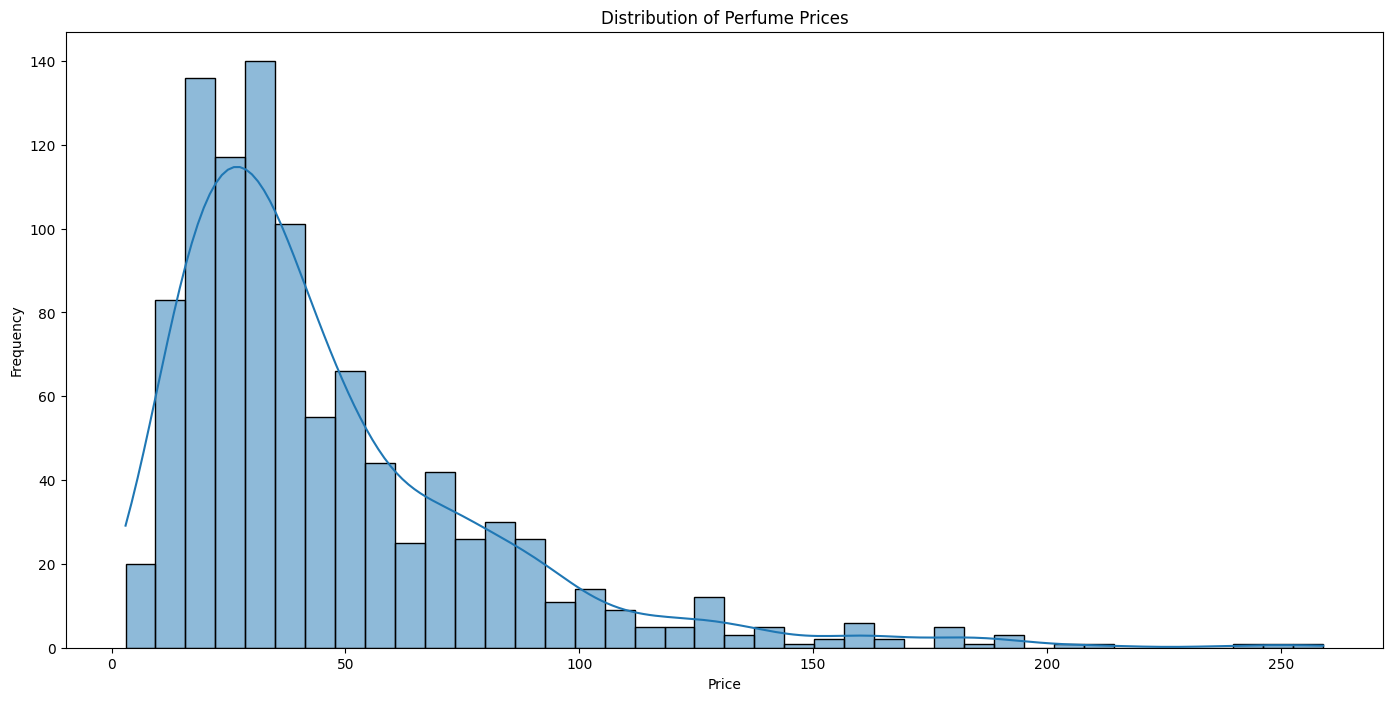

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('ebay_mens_perfume.csv')
plt.figure(figsize=(17, 8))

#Insert histrogram plot
sns.histplot(df['price'], bins=40, kde=True)
plt.title('Distribution of Perfume Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Conclusion: Starting perfume price is urge then huge cut-down in price

Business Question <br>
6. What impact does the seller's location have on pricing and sales?


In [ ]:
import pandas as pd
df = pd.read_csv('/content/ebay_mens_perfume.csv')
location_sales_price =df.groupby('itemLocation').agg(
    total_sales=('sold', 'sum'),
    average_price=('price', 'mean'),
    total_listings=('title', 'count')
).sort_values(by='total_sales', ascending=False)
location_sales_price.head(10)

,total_sales,average_price,total_listings
itemLocation,,,
"Hackensack, New Jersey, United States",422755.0,53.976762,105
"Dallas, Texas, United States",221711.0,32.357460,126
"LaGrange, Georgia, United States",18882.0,6.650000,1
"Houston, Texas, United States",13553.0,43.182857,28
"Katy, Texas, United States",9071.0,70.044400,25
"Brooklyn, New York, United States",5765.0,39.368421,76
"Edison, New Jersey, United States",5727.0,65.900286,35
"Pearland, Texas, United States",5619.0,17.405000,10
"Miami, Florida, United States",5473.0,54.354878,41


Conclusion: Average price are became very low but the total sales imapct is very urge in the perfume sales.

Business Question <br>
7. Calculate the sales v/s type of perfume in each type?

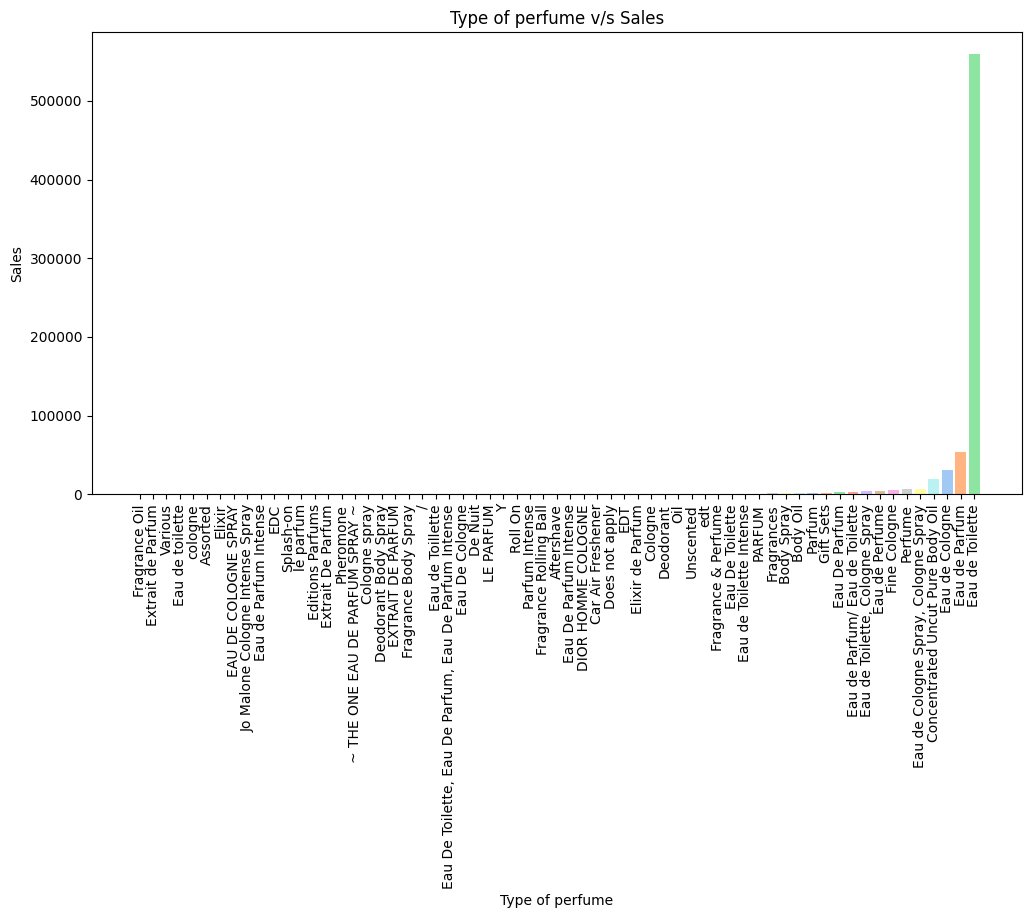

In [ ]:
type_sales = df.groupby('type').agg(total_sales=('sold', 'sum')).sort_values(by='total_sales', ascending=True)
type_sales.head(10)
Type_of_perfume = df['type'].value_counts()
Sales_perfume = df['sold'].value_counts()

# Bar chart for Type of perfume v/s Sales
plt.figure(figsize=(12, 6))
plt.bar(type_sales.index, type_sales['total_sales'], color=sns.color_palette('pastel', len(type_sales)))
plt.title('Type of perfume v/s Sales')
plt.xlabel('Type of perfume')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

Conclusion: Analyzed each type of perfume with sales atlast Eau de Toilette is the best sold perfume.

Business Question <br>
8. Which are the type of perfume in top 10?

+--------+----------------------------------+
|   sold | type                             |
|--------+----------------------------------|
|  18882 | Concentrated Uncut Pure Body Oil |
|  12739 | Eau de Toilette                  |
|   5227 | Eau de Toilette                  |
|   5145 | Eau de Parfum                    |
|   4934 | Fine Cologne                     |
|   3171 | Eau de Toilette                  |
|   2703 | Eau de Toilette                  |
|   2611 | Eau de Toilette                  |
|   2206 | Eau de Toilette                  |
|   1995 | Eau de Toilette                  |
+--------+----------------------------------+


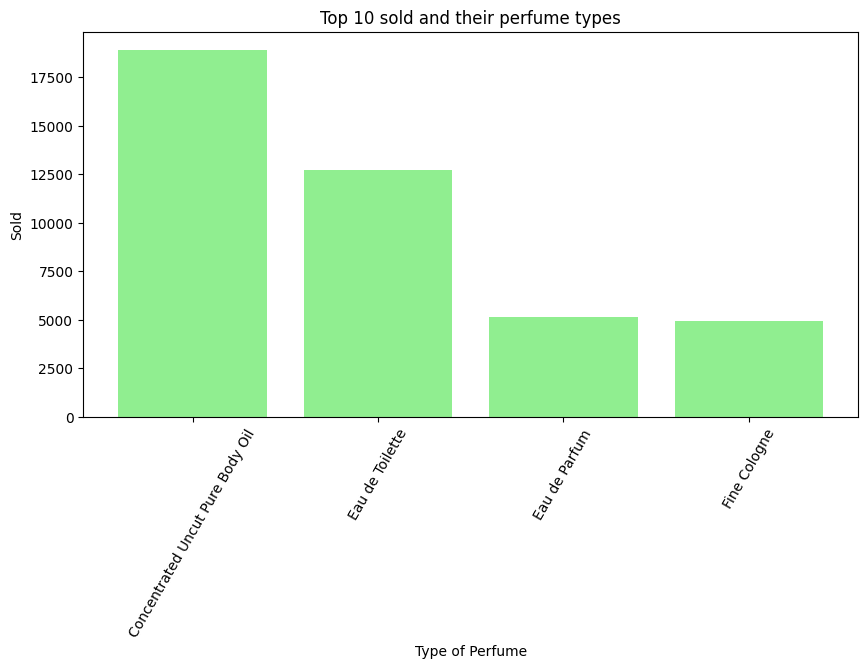

In [ ]:
from tabulate import tabulate
df_sales = df.sort_values(by='sold', ascending=False)
top10_sold = df_sales.head(10)

top10 = top10_sold[['sold', 'type']]

#Bar chart for top 10 type of perfume
print(tabulate(top10, headers='keys', tablefmt='psql', showindex=False))
plt.figure(figsize=(10, 5))
plt.bar(top10_sold['type'], top10_sold['sold'], color='lightgreen')
plt.title('Top 10 sold and their perfume types')
plt.xlabel('Type of Perfume')
plt.ylabel('Sold')
plt.xticks(rotation=60)
plt.show()

Conclusion: Arbeit the type of perfume with sold ones to get the top 10 perfume.Concentrated uncut pure body oil is the best one

# <u>**Concluding Thoughts and Discussion</u>**<br>

* **Responsibility**: The EDA significantly affects price, location sold available,brand. This analysis can be useful in perfume business,increasind the productivity & gain company growth<br>

* **Data-driven methodology**: To use python well served library to analysie the possible effective data analysis. We can easily analyze the decision through this approach.<br>

* **Outcomes that can be taken**: The analysis yielded identifiable results that are relavant to the day to day of the organization & marketing strategies defining the production of perfume & customer satisfaction.<br>

#**<u>Challenges</u>**<br>

* **Data obstacles**: This data powerful to use for data analysis.  But there are some limitations there are some misiing data & samples might be a unbalanced source.<br>

* **Lack of missing data**: There are some missing values in the dataset for visualization.

#**<u>Recommendation</u>**

* **Missing data or more data features required**: To explore the data and get more observations and conclusions

* **Based on available dataset**: price distribution of perfumes is a very important data. Giving more offer prices or discounts can increase the perfume sales in ebay.
Top sold type of perfumes - Eau De Toilette, Fine Cologne, Concentrated Uncut Body, Eau de Parfum - Increase the stock or availability in e-bay can increase the business revenue.




